# Decision Tree Regression

# 1. Data Acquisition:

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset 
housing_data = pd.read_csv("housing.csv",na_values=" ")
print(housing_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


# 2. Data Exploration:

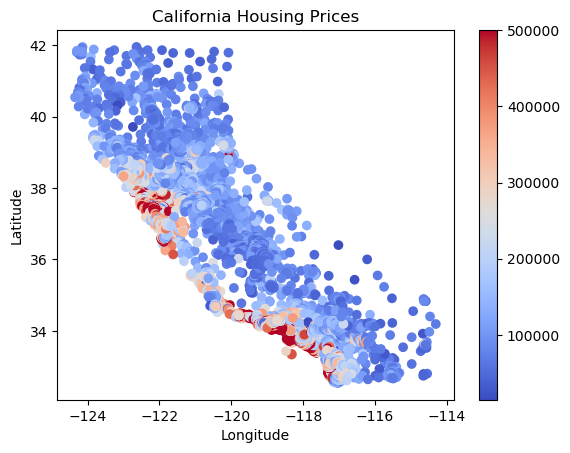

In [3]:
# Plotting a scatter plot to understand the relationship between latitude, longitude and house prices
plt.scatter(housing_data["longitude"], housing_data["latitude"], c=housing_data["median_house_value"], cmap='coolwarm')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices')
plt.show()

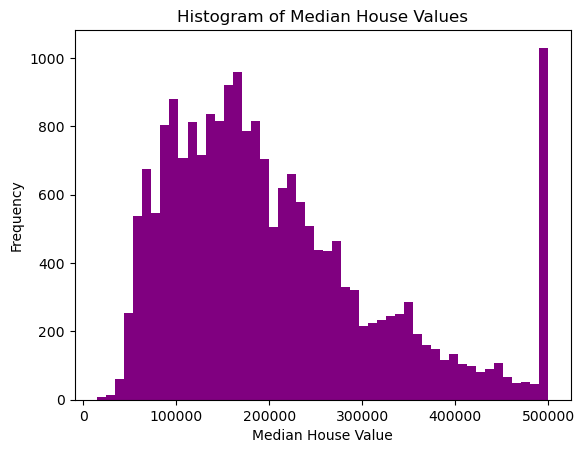

In [4]:
# Plotting a histogram to see the distribution of median house values
plt.hist(housing_data["median_house_value"], bins=50, color='purple')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Histogram of Median House Values')
plt.show()

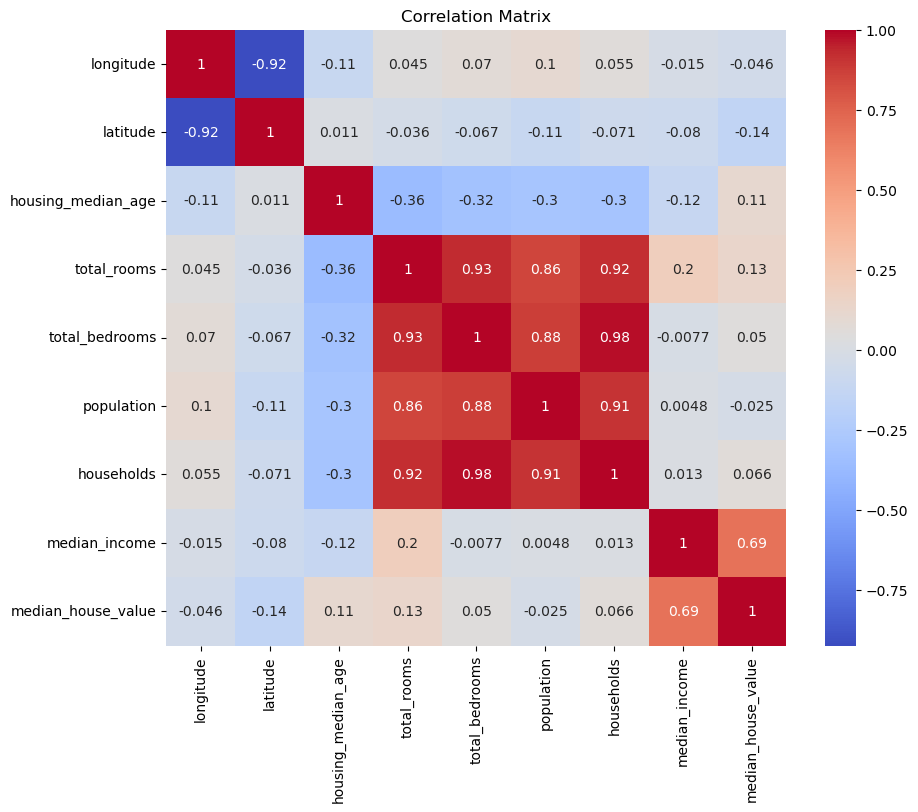

In [5]:
# Creating a correlation matrix to see the correlation between different features and the target variable
corr_matrix = housing_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3. Data Pre-processing:

In [6]:
# Checking for missing values and taking care of missing data by median
housing_data.isnull().sum()
housing_data.drop_duplicates(inplace=True)
housing_data.fillna(housing_data.median(), inplace=True)

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_10916\3187376930.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_data.fillna(housing_data.median(), inplace=True)


In [7]:
# Encoding categorical variables
housing_data['ocean_proximity'].value_counts()
pd.get_dummies(housing_data['ocean_proximity']).head()
housing_data.drop('ocean_proximity', axis=1).head()
housing_data = pd.concat([housing_data.drop('ocean_proximity', axis=1),pd.get_dummies(housing_data['ocean_proximity'])], axis=1)
housing_data = housing_data[['longitude',	'latitude',	'housing_median_age',	'total_rooms','total_bedrooms',	'population',	'households',	'median_income','<1H OCEAN','INLAND',	
                             'ISLAND',	'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
print(housing_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  <1H O

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = housing_data.iloc[:, :-1].values
y = housing_data.iloc[:, -1].values
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 4. Model Implementation:

In [9]:
#  Training the Decision Tree Regression model on the Training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=5, random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [10]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[168429.27 136900.  ]
 [274332.77 241300.  ]
 [163091.38 200700.  ]
 ...
 [124007.25 128600.  ]
 [193522.62 259500.  ]
 [212932.62 167600.  ]]


# 5. Model Evaluation:

In [11]:
# Evaluating the Model Performance

# Mean Squared Error
from sklearn.metrics import mean_squared_error
MSR = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",MSR)

# Root Mean Squared Error
RMSE = np.sqrt(MSR) 
print("Root Mean Squared Error: ",RMSE)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ",MAE)

# R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-Squared: ",r2)

Mean Squared Error:  5056843505.3736
Root Mean Squared Error:  71111.48645172312
Mean Absolute Error:  50415.63923000827
R-Squared:  0.6121918406536372
